# Exploratory Data Analysis - LendingClub Loan Data

This notebook performs comprehensive exploratory data analysis on the LendingClub dataset to understand the data structure, distributions, and relationships between features.

In [1]:
# Import necessary libraries
import sys
import os
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from src.data.data_loader import LendingClubDataLoader
from src.utils.helpers import setup_logging, print_data_summary, create_directories
from config.config import DATA_CONFIG, NUMERICAL_FEATURES, CATEGORICAL_FEATURES

# Setup
setup_logging()
create_directories()

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

2025-09-11 15:34:35,706 - src.utils.helpers - INFO - Logging setup complete. Level: INFO


Created directory: data/raw
Created directory: data/processed
Created directory: results/figures
Created directory: results/models
Created directory: results/logs
Created directory: reports


## 1. Data Loading and Initial Inspection

In [2]:
# Initialize data loader
data_loader = LendingClubDataLoader()

# Load data (sample for faster processing during development)
print("Loading LendingClub data...")
df_raw = data_loader.load_raw_data(sample_size=DATA_CONFIG.sample_size)

print(f"Dataset shape: {df_raw.shape}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

2025-09-11 15:34:42,298 - src.data.data_loader - INFO - Loading data from D:/AI_SHODH/data/raw/accepted_2007_to_2018.csv


Loading LendingClub data...


2025-09-11 15:34:46,116 - src.data.data_loader - INFO - Loaded 100000 rows and 151 columns


Dataset shape: (100000, 151)
Memory usage: 274.52 MB


In [3]:
# Basic dataset information
print_data_summary(df_raw, "Raw LendingClub Dataset")


Raw LendingClub Dataset
Shape: (100000, 151)
Memory usage: 274.52 MB

Data types:
float64    114
object      36
int64        1
Name: count, dtype: int64

Missing values:
                          Missing  Percentage
member_id                  100000     100.000
revol_bal_joint            100000     100.000
sec_app_fico_range_high    100000     100.000
sec_app_earliest_cr_line   100000     100.000
sec_app_inq_last_6mths     100000     100.000
...                           ...         ...
last_pymnt_d                   71       0.071
revol_util                     37       0.037
last_credit_pull_d              3       0.003
dti                             2       0.002
num_rev_accts                   1       0.001

[73 rows x 2 columns]

Numerical columns summary:
                 id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.000000e+05        0.0  100000.000000  100000.000000    100000.000000   
mean   6.532613e+07        NaN   15055.861000   15055.861000    

In [5]:
# Display first few rows
print("First 5 rows:")
df_raw.head()

First 5 rows:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
75721,63957998,NaN,14400.0,14400.0,14400.0,60 months,16.55,354.41,D,D2,CPL,3 years,OWN,45204.0,Source Verified,Nov-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,799xx,TX,27.42,0.0,Aug-2012,680.0,684.0,0.0,NaN,NaN,8.0,0.0,7679.0,48.9,11.0,w,6157.28,6157.28,14163.160000,14163.16,8242.72,5920.44,0.0,0.0,0.0,Mar-2019,354.41,Apr-2019,Mar-2019,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15700.0,NaN,NaN,NaN,7.0,20375.0,5168.0,49.8,0.0,0.0,26.0,38.0,3.0,1.0,1.0,3.0,NaN,10.0,NaN,0.0,3.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,8.0,0.0,0.0,0.0,6.0,100.0,33.3,0.0,0.0,172728.0,37147.0,10300.0,29392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
80184,61943206,NaN,30000.0,30000.0,29900.0,60 months,12.69,677.85,C,C2,Engineering Manager,2 years,MORTGAGE,131000.0,Source Verified,Nov-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,301xx,GA,33.80,0.0,Apr-1998,685.0,689.0,0.0,65.0,NaN,17.0,0.0,120483.0,89.6,29.0,w,12161.04,12120.50,27092.850000,27002.54,17838.96,9253.89,0.0,0.0,0.0,Mar-2019,677.85,Apr-2019,Mar-2019,714.0,710.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,352697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124200.0,NaN,NaN,NaN,2.0,20747.0,5139.0,89.6,0.0,0.0,122.0,210.0,17.0,16.0,3.0,17.0,NaN,NaN,NaN,0.0,7.0,8.0,7.0,11.0,13.0,8.0,13.0,8.0,17.0,0.0,0.0,0.0,0.0,96.6,85.7,0.0,0.0,455789.0,163510.0,

Loan Status Distribution:
loan_status
Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: count, dtype: int64


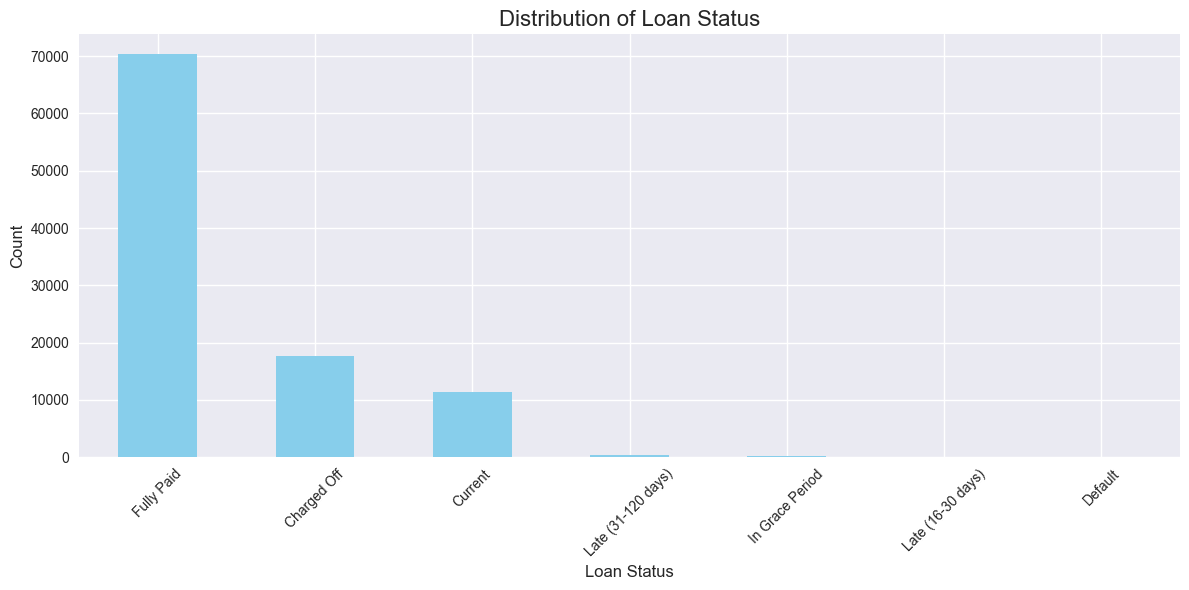

In [6]:
# Check loan status distribution
print("Loan Status Distribution:")
loan_status_counts = df_raw['loan_status'].value_counts()
print(loan_status_counts)

# Visualize loan status distribution
plt.figure(figsize=(12, 6))
loan_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Target Variable Creation and Analysis

In [7]:
# Create binary target variable
df = data_loader.create_binary_target(df_raw)

print(f"Dataset shape after target creation: {df.shape}")
print("\nTarget variable distribution:")
target_counts = df['target'].value_counts()
print(target_counts)
print(f"\nDefault rate: {target_counts[1] / len(df):.2%}")

2025-09-11 15:35:32,385 - src.data.data_loader - INFO - Target distribution:
target
0    70288
1    18111
Name: count, dtype: int64


Dataset shape after target creation: (88399, 152)

Target variable distribution:
target
0    70288
1    18111
Name: count, dtype: int64

Default rate: 20.49%


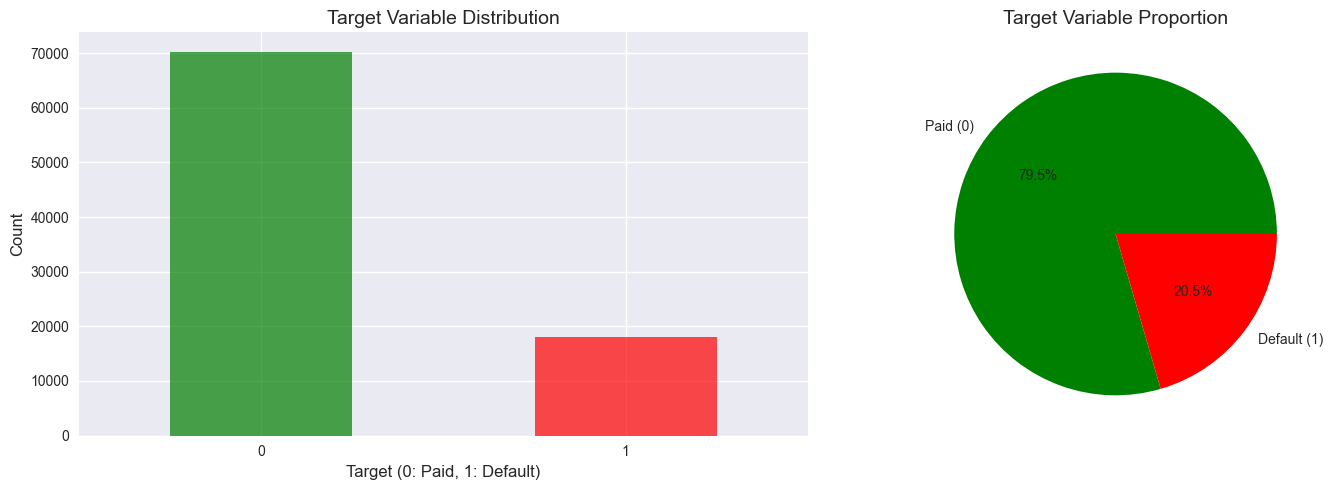

In [9]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Target Variable Distribution', fontsize=14)
axes[0].set_xlabel('Target (0: Paid, 1: Default)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(target_counts.values, labels=['Paid (0)', 'Default (1)'], 
           autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Target Variable Proportion', fontsize=14)

plt.tight_layout()
plt.show()

## 3. Numerical Features Analysis

In [10]:
# Identify available numerical features
available_numerical = [col for col in NUMERICAL_FEATURES if col in df.columns]
print(f"Available numerical features ({len(available_numerical)}):")
print(available_numerical)

# Basic statistics for numerical features
print("\nNumerical features statistics:")
df[available_numerical].describe()

Available numerical features (25):
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

Numerical features statistics:


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,88399.000000,88399.000000,88399.000000,88399.000000,88399.000000,8.839900e+04,88397.000000,88399.000000,88399.000000,88399.000000,88399.000000,45960.000000,16228.000000,88399.000000,88399.000000,88399.000000,88363.000000,88399.000000,88399.000000,26442.000000,88399.000000,88399.000000,8.839900e+04,88399.000000
mean,14401.227955,14401.227955,14392.815247,11.963732,430.039399,7.768584e+04,18.997866,0.350570,694.468999,698.469146,0.598932,34.191667,65.421679,11.864467,0.245263,17032.008778,51.657678,25.161506,0.022466,44.218440,0.005848,278.772961,1.394858e+05,33863.121008
std,8596.378418,8596.378418,8591.436515,4.132197,253.449762,8.949235e+04,9.698046,0.928724,31.081343,31.082057,0.886258,22.005491,23.507914,5.664467,0.720424,23316.281058,24.133651,12.149544,0.163026,21.456696,0.080860,2119.424769,1.579452e+05,34461.174795
min,1000.000000,1000.000000,900.000000,5.320000,14.770000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,8000.000000,7975.000000,8.490000,245.520000,4.600000e+04,12.330000,0.000000,670.000000,674.000000,0.000000,15.000000,50.000000,8.000000,0.000000,5980.500000,33.550000,16.000000,0.000000,27.000000,0.000000,0.000000,3.006950e+04,14000.000000
50%,12000.000000,12000.000000,12000.000000,11.530000,369.930000,6.500000e+04,18.420000,0.000000,685.000000,689.000000,0.000000,31.000000,67.000000,11.000000,0.000000,11268.000000,51.400000,23.000000,0.000000,44.000000,0.000000,0.000000,7.768400e+04,24500.000000
75%,20000.000000,20000.000000,20000.000000,14.330000,572.190000,9.260400e+04,25.230000,0.000000,710.000000,714.000000,1.000000,50.000000,81.000000,15.000000,0.000000,20433.000000,69.900000,32.000000,0.000000,63.000000,0.000000,0.000000,2.057700e+05,42100.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1354.660000,9.000000e+06,999.000000,30.000000,845.000000,850.000000,5.000000,157.000000,120.000000,67.000000,86.000000,898146.000000,152.500000,135.000000,5.000000,157.000000,4.000000,169257.000000,3.608951e+06,888800.000000


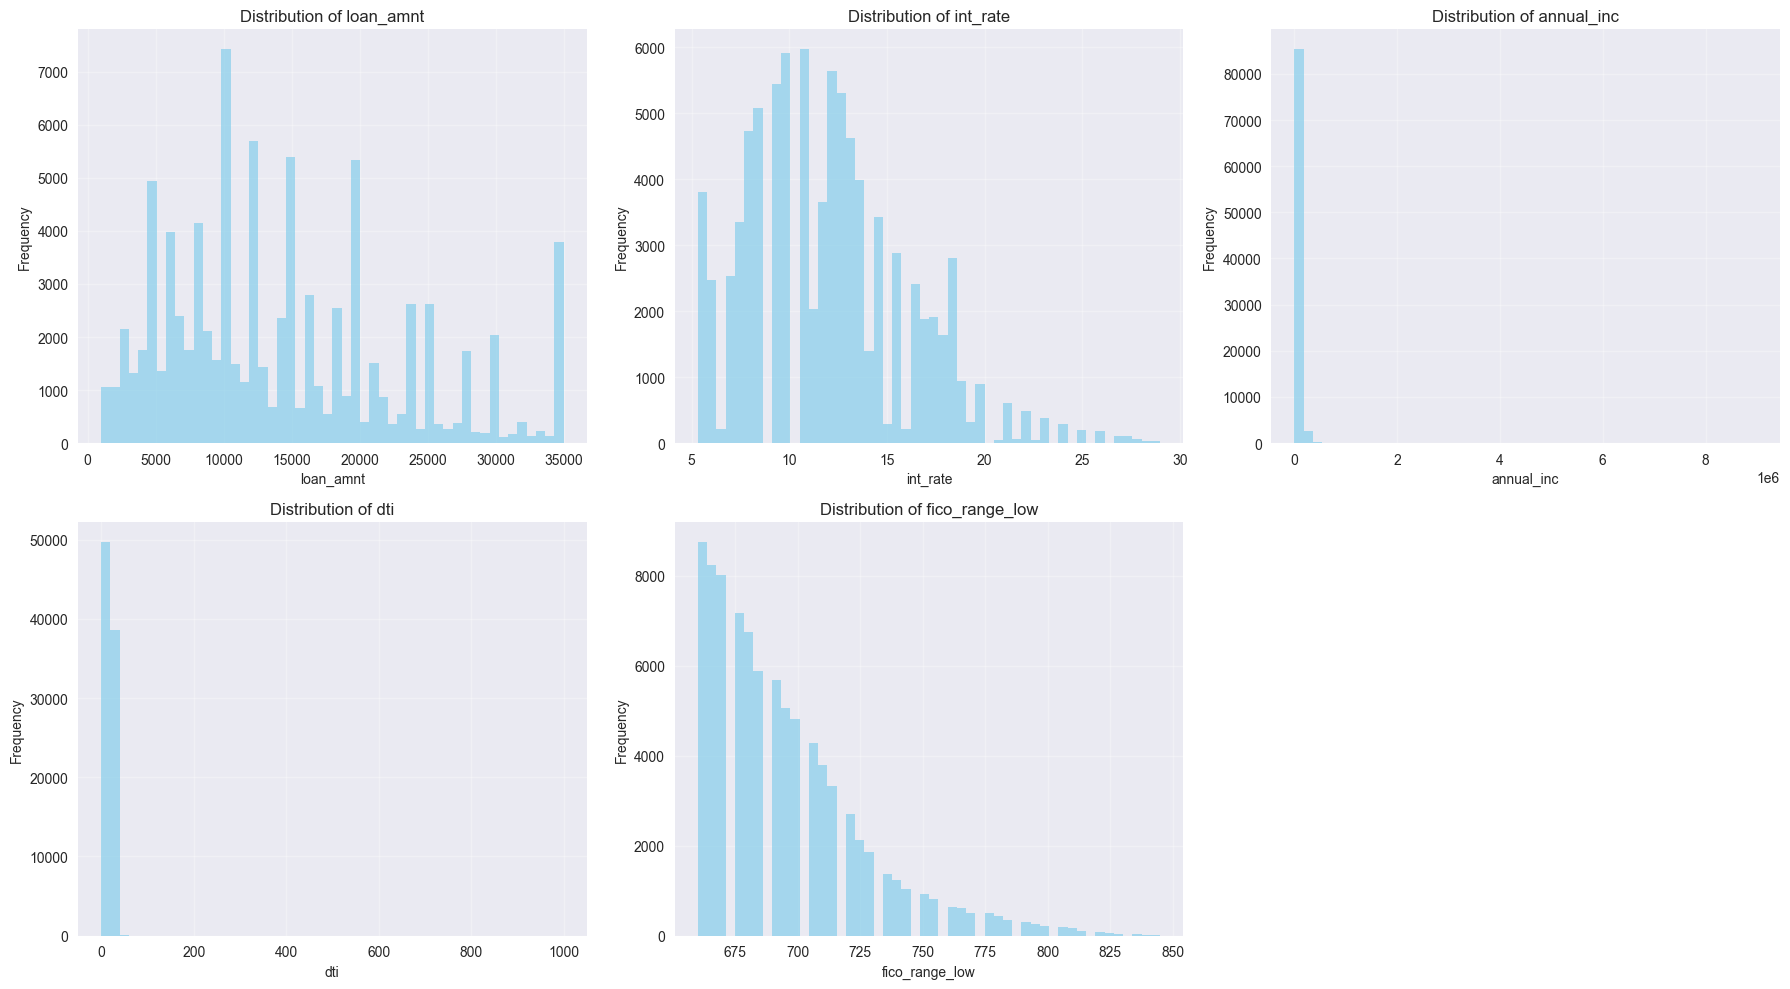

In [11]:
# Distribution of key numerical features
key_numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low']
available_key_features = [col for col in key_numerical_features if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(available_key_features[:6]):
    if i < len(axes):
        # Histogram
        df[feature].hist(bins=50, ax=axes[i], alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {feature}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for j in range(len(available_key_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

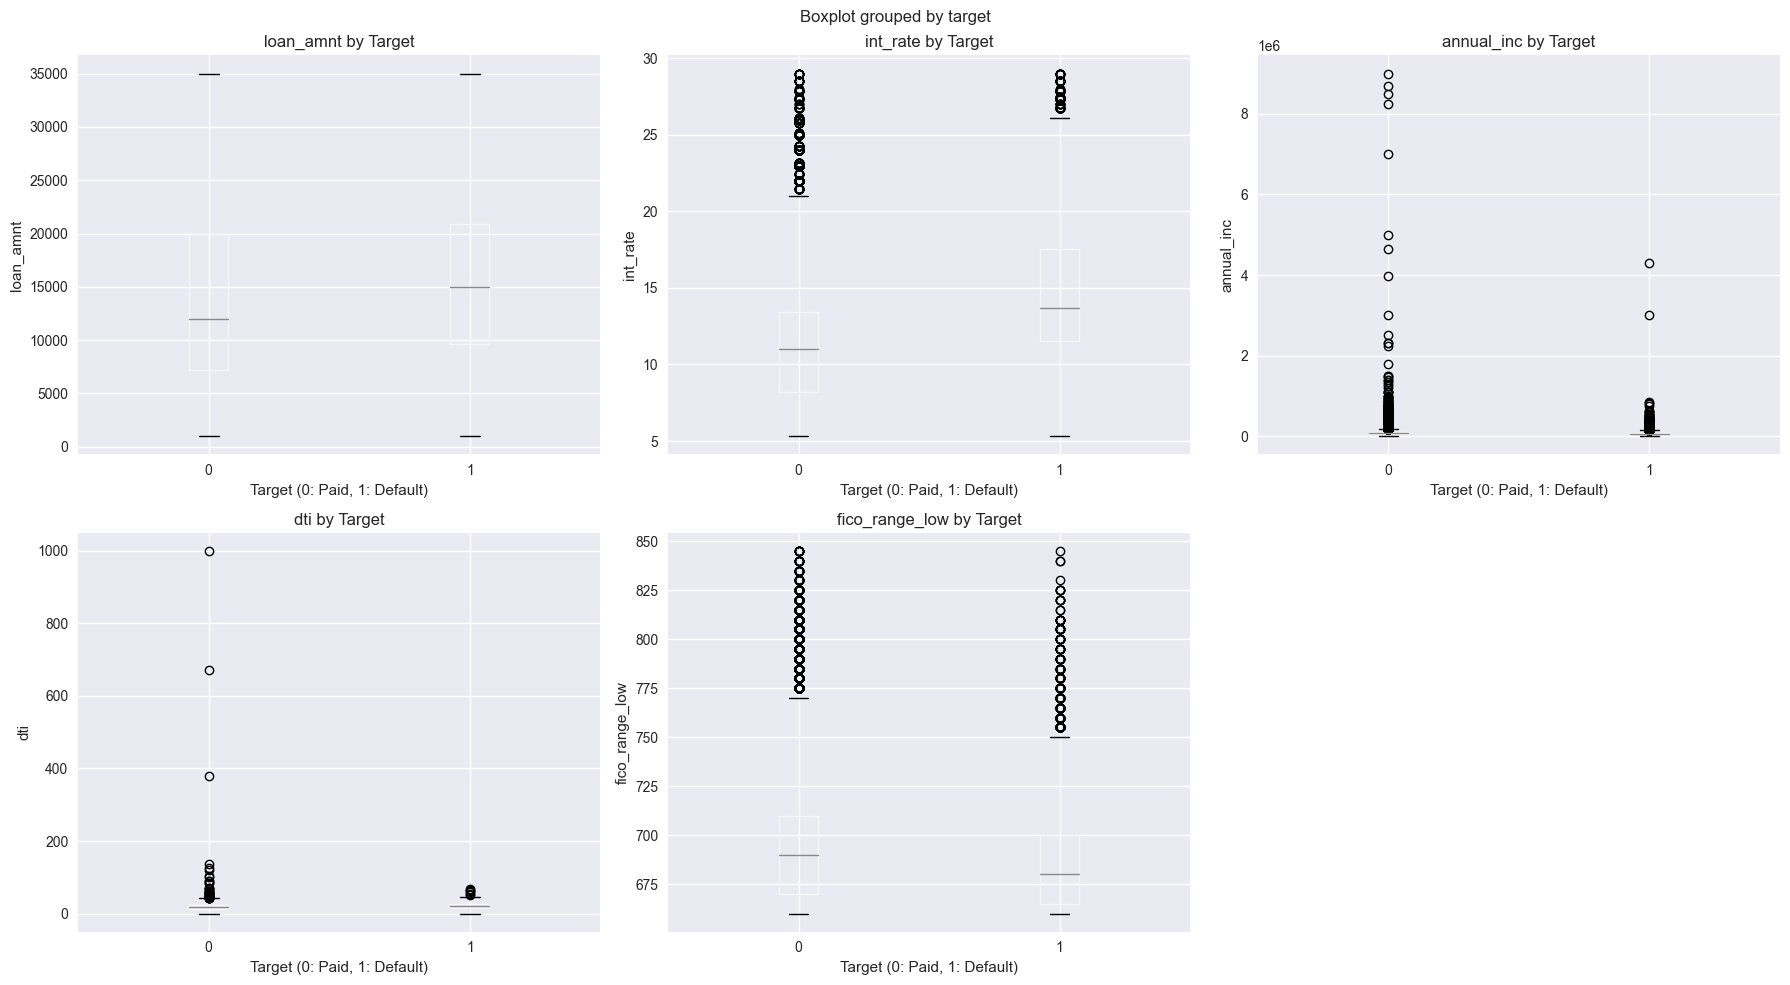

In [12]:
# Box plots by target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(available_key_features[:6]):
    if i < len(axes):
        df.boxplot(column=feature, by='target', ax=axes[i])
        axes[i].set_title(f'{feature} by Target')
        axes[i].set_xlabel('Target (0: Paid, 1: Default)')
        axes[i].set_ylabel(feature)

# Hide unused subplots
for j in range(len(available_key_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

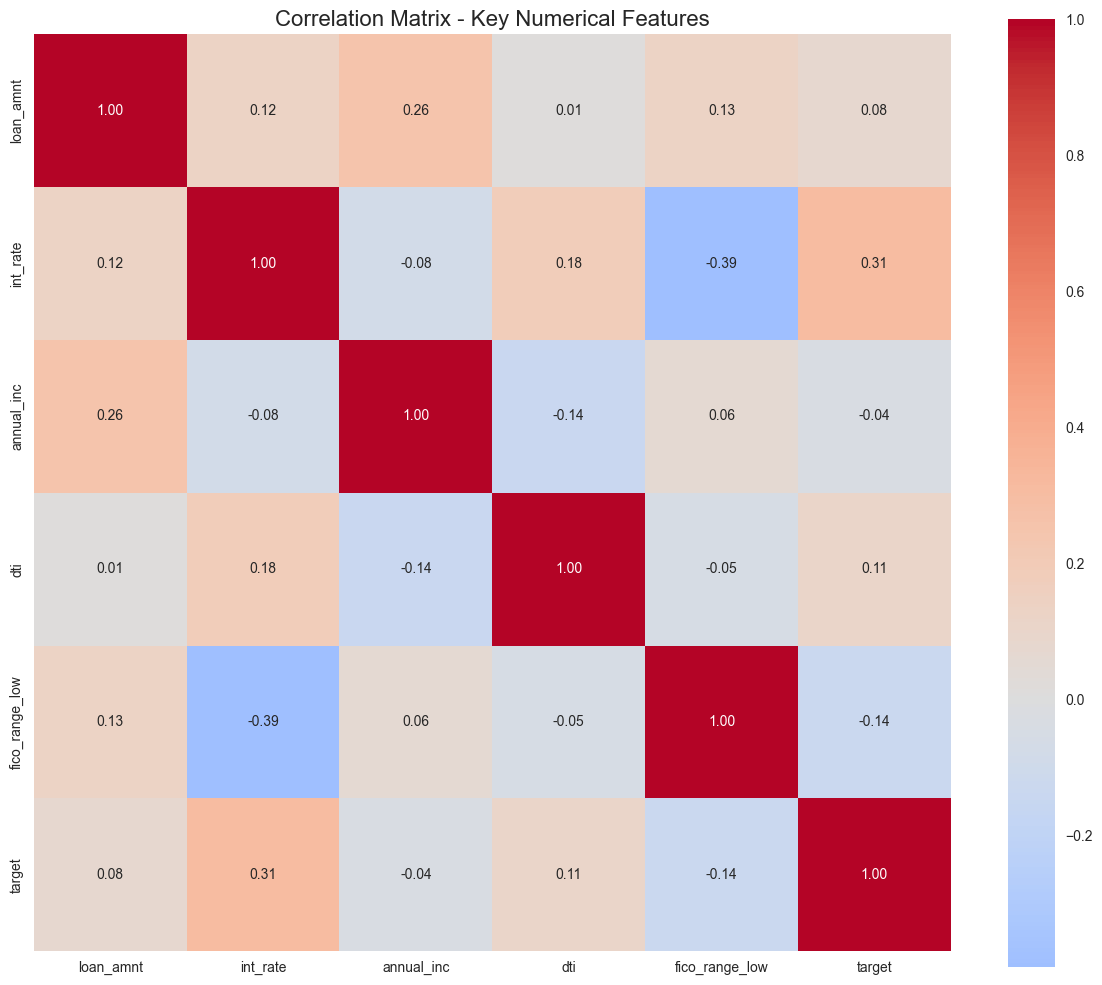


Correlations with target variable:
int_rate          0.311477
fico_range_low   -0.135966
dti               0.107101
loan_amnt         0.077048
annual_inc       -0.037076
Name: target, dtype: float64


In [13]:
# Correlation matrix for numerical features
correlation_features = available_key_features + ['target']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix - Key Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Show correlations with target
target_correlations = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
print("\nCorrelations with target variable:")
print(target_correlations)

## 4. Categorical Features Analysis

In [14]:
# Identify available categorical features
available_categorical = [col for col in CATEGORICAL_FEATURES if col in df.columns]
print(f"Available categorical features ({len(available_categorical)}):")
print(available_categorical)

# Check unique values for categorical features
print("\nUnique values count for categorical features:")
for feature in available_categorical[:10]:  # Show first 10
    unique_count = df[feature].nunique()
    print(f"{feature}: {unique_count} unique values")

Available categorical features (10):
['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

Unique values count for categorical features:
grade: 7 unique values
sub_grade: 35 unique values
emp_title: 33822 unique values
emp_length: 11 unique values
home_ownership: 4 unique values
verification_status: 3 unique values
purpose: 12 unique values
addr_state: 49 unique values
initial_list_status: 2 unique values
application_type: 2 unique values


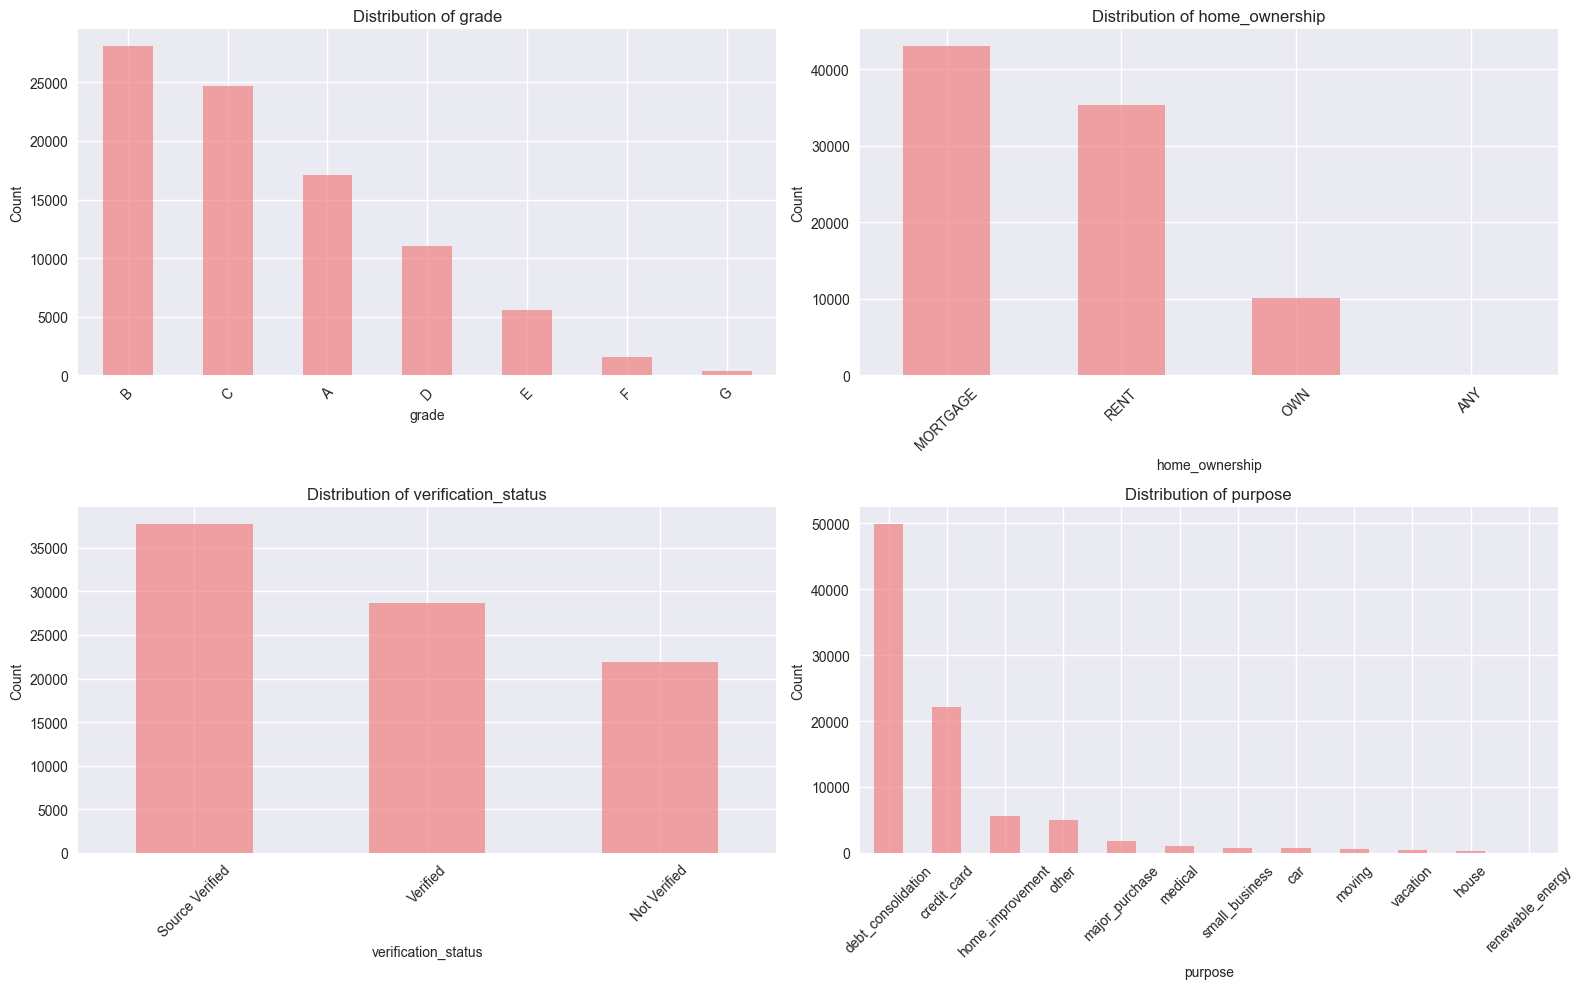

In [15]:
# Distribution of key categorical features
key_categorical_features = ['grade', 'home_ownership', 'verification_status', 'purpose']
available_key_cat = [col for col in key_categorical_features if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(available_key_cat[:4]):
    if i < len(axes):
        feature_counts = df[feature].value_counts()
        feature_counts.plot(kind='bar', ax=axes[i], color='lightcoral', alpha=0.7)
        axes[i].set_title(f'Distribution of {feature}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

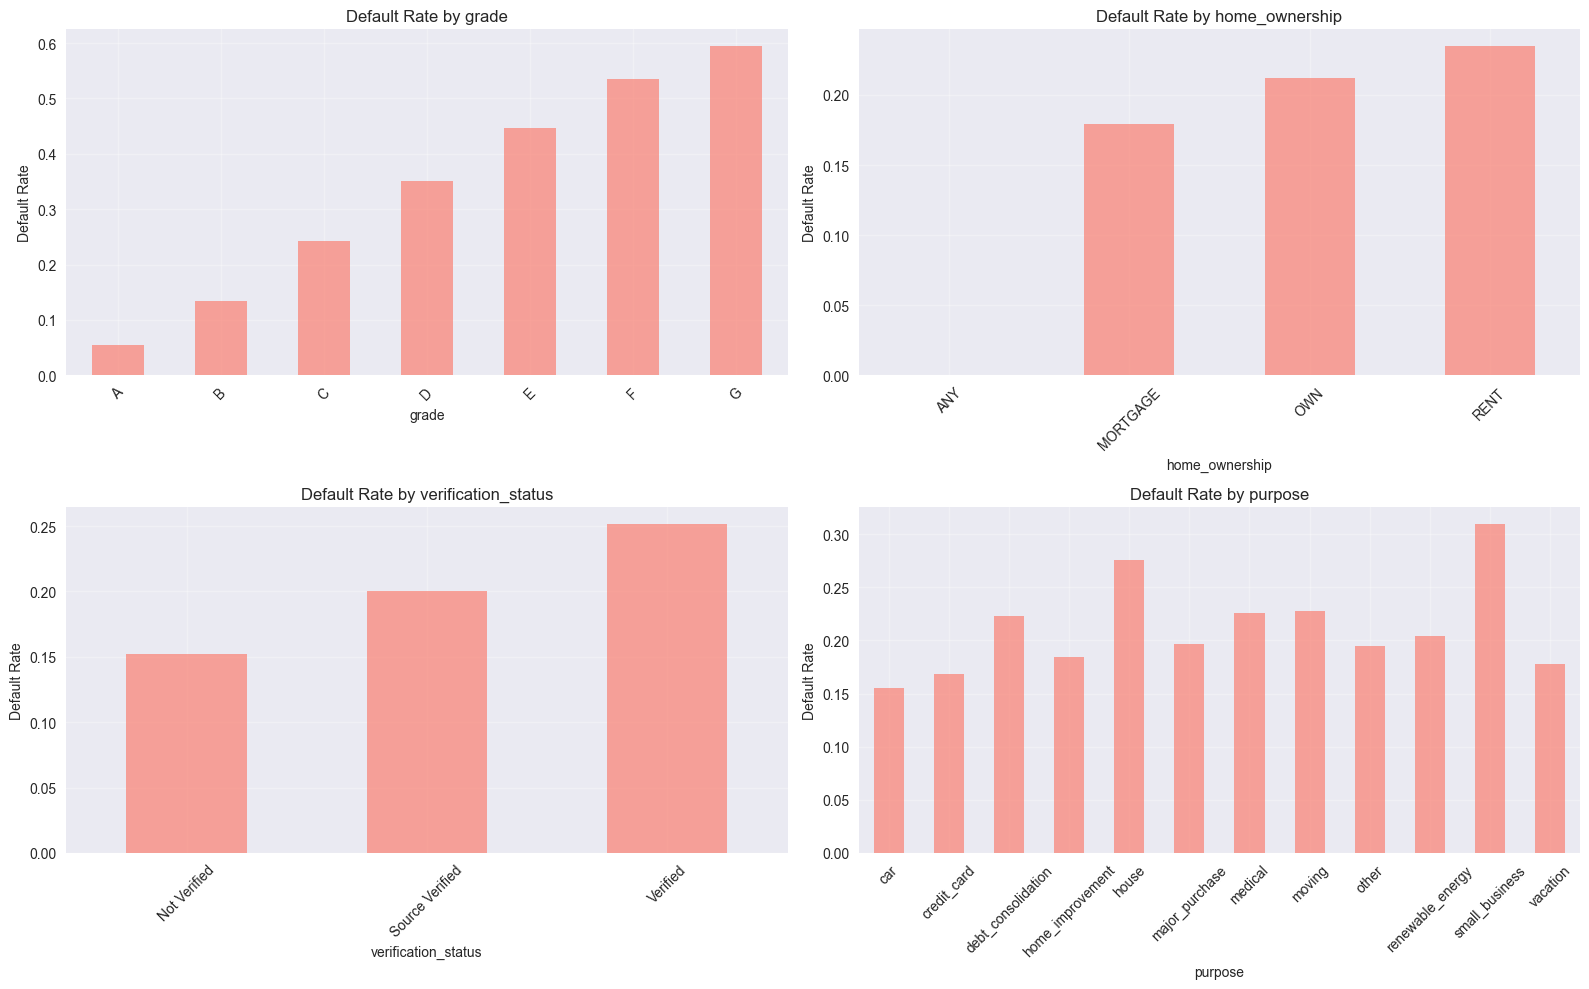


grade - Default rates:
       count   sum   mean
grade                    
A      17071   919  0.054
B      28108  3780  0.134
C      24682  5998  0.243
D      11057  3882  0.351
E       5583  2495  0.447
F       1557   834  0.536
G        341   203  0.595

home_ownership - Default rates:
                count   sum   mean
home_ownership                    
ANY                 1     0  0.000
MORTGAGE        43031  7686  0.179
OWN             10038  2127  0.212
RENT            35329  8298  0.235

verification_status - Default rates:
                     count   sum   mean
verification_status                    
Not Verified         21913  3332  0.152
Source Verified      37785  7557  0.200
Verified             28701  7222  0.252

purpose - Default rates:
                    count    sum   mean
purpose                                
car                   789    122  0.155
credit_card         22147   3726  0.168
debt_consolidation  49954  11144  0.223
home_improvement     5618   1032  0

In [16]:
# Default rates by categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(available_key_cat[:4]):
    if i < len(axes):
        default_rates = df.groupby(feature)['target'].agg(['count', 'sum', 'mean']).round(3)
        default_rates['default_rate'] = default_rates['mean']
        
        default_rates['default_rate'].plot(kind='bar', ax=axes[i], color='salmon', alpha=0.7)
        axes[i].set_title(f'Default Rate by {feature}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Default Rate', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
for feature in available_key_cat[:4]:
    print(f"\n{feature} - Default rates:")
    default_rates = df.groupby(feature)['target'].agg(['count', 'sum', 'mean']).round(3)
    print(default_rates)

## 5. Missing Values Analysis

In [17]:
# Missing values analysis
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing_Count'] > 0]
print(f"Features with missing values: {len(missing_df)}")
print("\nTop 20 features with missing values:")
print(missing_df.head(20))

Features with missing values: 73

Top 20 features with missing values:
                                            Missing_Count  Missing_Percentage
sec_app_chargeoff_within_12_mths                    88399              100.00
sec_app_inq_last_6mths                              88399              100.00
sec_app_open_acc                                    88399              100.00
sec_app_revol_util                                  88399              100.00
sec_app_open_act_il                                 88399              100.00
sec_app_num_rev_accts                               88399              100.00
sec_app_earliest_cr_line                            88399              100.00
sec_app_fico_range_high                             88399              100.00
sec_app_collections_12_mths_ex_med                  88399              100.00
sec_app_mths_since_last_major_derog                 88399              100.00
sec_app_fico_range_low                              88399              

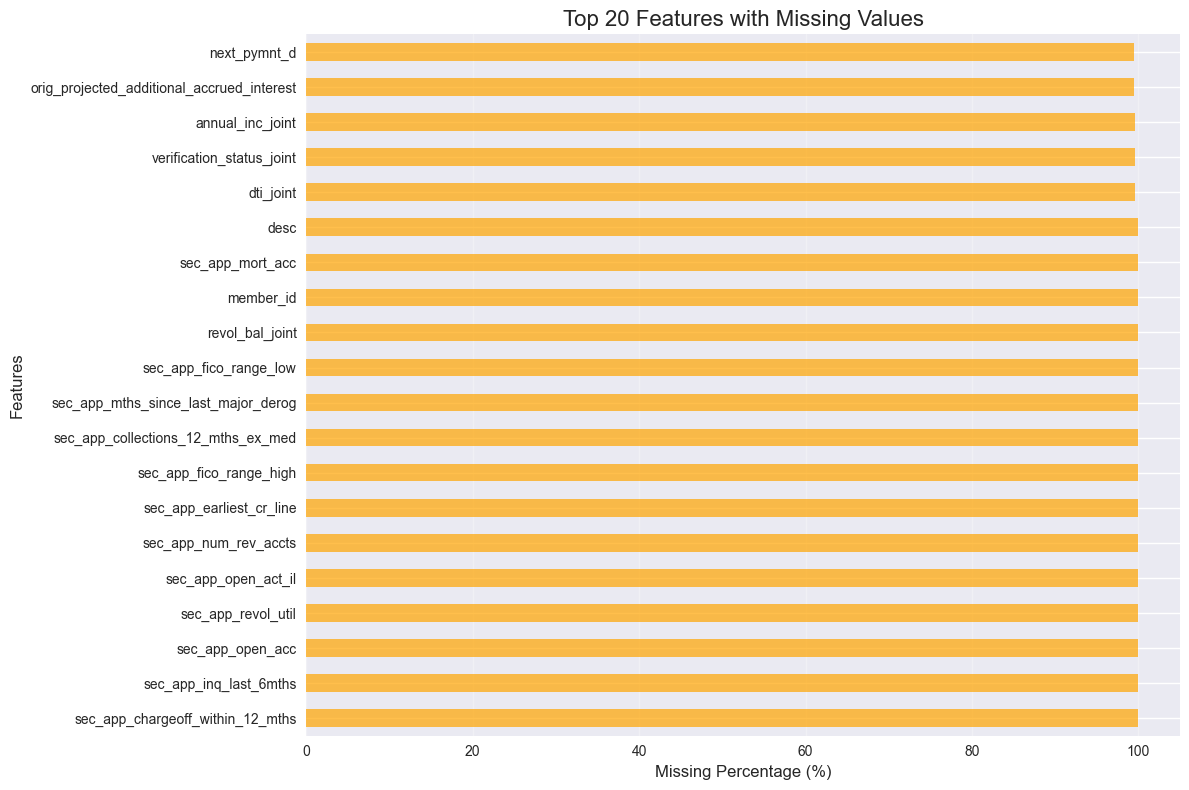

In [18]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    missing_df.head(20)['Missing_Percentage'].plot(kind='barh', color='orange', alpha=0.7)
    plt.title('Top 20 Features with Missing Values', fontsize=16)
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")

## 6. Financial Analysis

Financial Analysis:
Total loans: 88,399
Total loan amount: $1,273,054,150.00
Average loan amount: $14401.23
Average interest rate: 11.96%
Total potential profit if all paid: $156,191,003.96
Actual total outcome: $-170,890,478.82
Loss due to defaults: $284,451,900.00


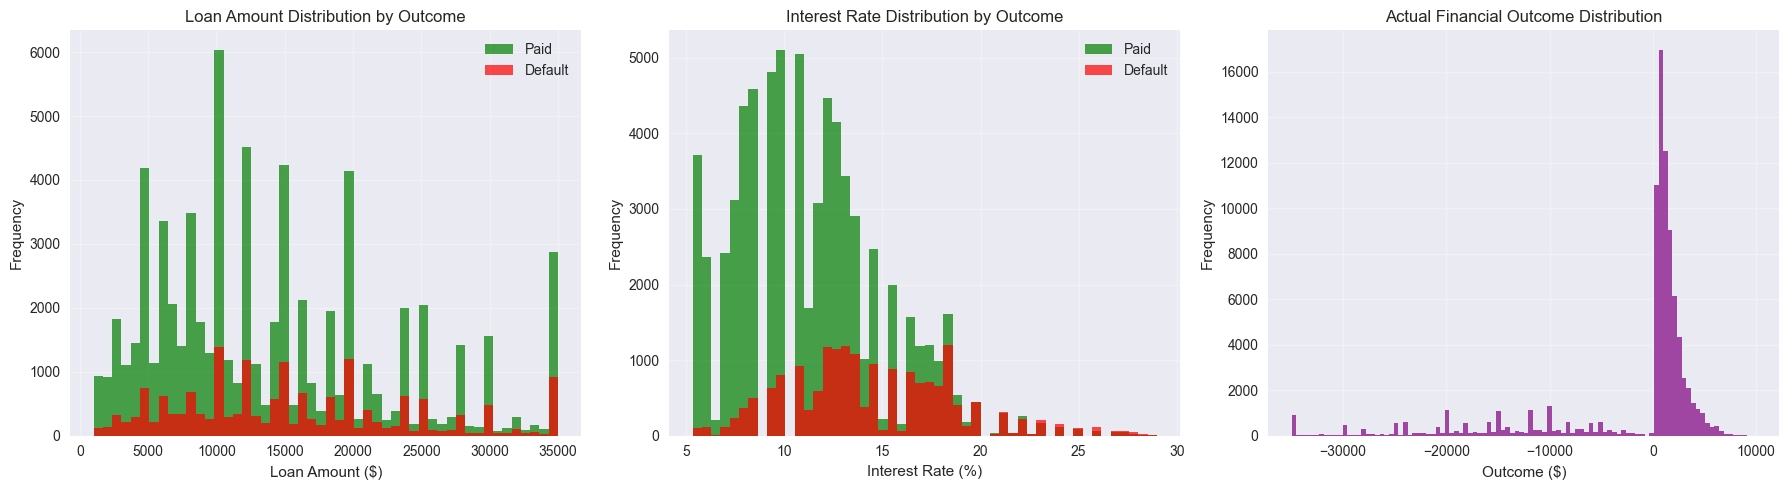

In [19]:
# Financial impact analysis
if 'loan_amnt' in df.columns and 'int_rate' in df.columns:
    # Calculate potential profit/loss per loan
    df['potential_profit'] = df['loan_amnt'] * (df['int_rate'] / 100)
    df['actual_outcome'] = np.where(df['target'] == 0, df['potential_profit'], -df['loan_amnt'])
    
    print("Financial Analysis:")
    print(f"Total loans: {len(df):,}")
    print(f"Total loan amount: ${df['loan_amnt'].sum():,.2f}")
    print(f"Average loan amount: ${df['loan_amnt'].mean():.2f}")
    print(f"Average interest rate: {df['int_rate'].mean():.2f}%")
    print(f"Total potential profit if all paid: ${df['potential_profit'].sum():,.2f}")
    print(f"Actual total outcome: ${df['actual_outcome'].sum():,.2f}")
    print(f"Loss due to defaults: ${df[df['target']==1]['loan_amnt'].sum():,.2f}")
    
    # Visualize financial outcomes
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Loan amount distribution by target
    df[df['target']==0]['loan_amnt'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                         label='Paid', color='green')
    df[df['target']==1]['loan_amnt'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                         label='Default', color='red')
    axes[0].set_title('Loan Amount Distribution by Outcome')
    axes[0].set_xlabel('Loan Amount ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Interest rate distribution by target
    df[df['target']==0]['int_rate'].hist(bins=50, ax=axes[1], alpha=0.7, 
                                        label='Paid', color='green')
    df[df['target']==1]['int_rate'].hist(bins=50, ax=axes[1], alpha=0.7, 
                                        label='Default', color='red')
    axes[1].set_title('Interest Rate Distribution by Outcome')
    axes[1].set_xlabel('Interest Rate (%)')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Actual outcome distribution
    df['actual_outcome'].hist(bins=100, ax=axes[2], alpha=0.7, color='purple')
    axes[2].set_title('Actual Financial Outcome Distribution')
    axes[2].set_xlabel('Outcome ($)')
    axes[2].set_ylabel('Frequency')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 7. Feature Selection Recommendations

In [20]:
# Analyze feature importance for selection
print("FEATURE SELECTION RECOMMENDATIONS")
print("=" * 50)

# 1. Numerical features with high correlation to target
print("\n1. HIGH-CORRELATION NUMERICAL FEATURES:")
if len(target_correlations) > 0:
    high_corr_features = target_correlations[abs(target_correlations) > 0.1]
    print(high_corr_features)
else:
    print("No high correlation numerical features found.")

# 2. Categorical features with varying default rates
print("\n2. CATEGORICAL FEATURES WITH SIGNIFICANT DEFAULT RATE VARIATION:")
categorical_importance = {}

for feature in available_key_cat:
    default_rates = df.groupby(feature)['target'].mean()
    rate_std = default_rates.std()
    categorical_importance[feature] = rate_std
    print(f"{feature}: Default rate std = {rate_std:.4f}")

# 3. Features with manageable missing values
print("\n3. FEATURES WITH LOW MISSING VALUES (<20%):")
low_missing_features = missing_df[missing_df['Missing_Percentage'] < 20].index.tolist()
if low_missing_features:
    print(low_missing_features)
else:
    print("All features with missing values have >20% missing.")

# Final recommendations
print("\n4. FINAL FEATURE SELECTION RECOMMENDATIONS:")
recommended_numerical = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'fico_range_low', 'fico_range_high', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'
]
recommended_numerical = [f for f in recommended_numerical if f in df.columns]

recommended_categorical = [
    'grade', 'sub_grade', 'home_ownership', 'verification_status', 
    'purpose', 'addr_state', 'initial_list_status'
]
recommended_categorical = [f for f in recommended_categorical if f in df.columns]

print(f"\nRecommended Numerical Features ({len(recommended_numerical)}):")
print(recommended_numerical)
print(f"\nRecommended Categorical Features ({len(recommended_categorical)}):")
print(recommended_categorical)
print(f"\nTotal Recommended Features: {len(recommended_numerical) + len(recommended_categorical)}")

FEATURE SELECTION RECOMMENDATIONS

1. HIGH-CORRELATION NUMERICAL FEATURES:
int_rate          0.311477
fico_range_low   -0.135966
dti               0.107101
Name: target, dtype: float64

2. CATEGORICAL FEATURES WITH SIGNIFICANT DEFAULT RATE VARIATION:
grade: Default rate std = 0.2035
home_ownership: Default rate std = 0.1068
verification_status: Default rate std = 0.0498
purpose: Default rate std = 0.0448

3. FEATURES WITH LOW MISSING VALUES (<20%):
['mths_since_recent_inq', 'emp_title', 'emp_length', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'percent_bc_gt_75', 'bc_util', 'bc_open_to_buy', 'mths_since_recent_bc', 'title', 'last_pymnt_d', 'revol_util', 'last_credit_pull_d', 'dti', 'num_rev_accts']

4. FINAL FEATURE SELECTION RECOMMENDATIONS:

Recommended Numerical Features (13):
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

Recommended Categorical Featur

## 8. Data Quality Summary

In [21]:
# Data quality summary
print("DATA QUALITY SUMMARY")
print("=" * 50)

total_features = len(df.columns)
features_with_missing = len(missing_df)
complete_features = total_features - features_with_missing

print(f"Total features in dataset: {total_features}")
print(f"Features with missing values: {features_with_missing} ({features_with_missing/total_features*100:.1f}%)")
print(f"Complete features: {complete_features} ({complete_features/total_features*100:.1f}%)")
print(f"\nDataset completeness: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.1f}%")
print(f"Target variable balance: {df['target'].mean():.1%} default rate")

# Memory usage
memory_usage_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"\nMemory usage: {memory_usage_mb:.2f} MB")
print(f"Average memory per row: {memory_usage_mb/len(df)*1024:.2f} KB")

print("\nRECOMMENDations FOR PREPROCESSING:")
print("1. Handle missing values using median/mode imputation")
print("2. Encode categorical variables using one-hot encoding")
print("3. Scale numerical features using StandardScaler")
print("4. Consider feature selection based on correlation and importance")
print("5. Address class imbalance if necessary")

DATA QUALITY SUMMARY
Total features in dataset: 154
Features with missing values: 73 (47.4%)
Complete features: 81 (52.6%)

Dataset completeness: 65.3%
Target variable balance: 20.5% default rate

Memory usage: 244.04 MB
Average memory per row: 2.83 KB

RECOMMENDations FOR PREPROCESSING:
1. Handle missing values using median/mode imputation
2. Encode categorical variables using one-hot encoding
3. Scale numerical features using StandardScaler
4. Consider feature selection based on correlation and importance
5. Address class imbalance if necessary


In [23]:
# Save processed data for next notebook
print("Saving processed data...")
import os

# Save processed data for next notebook
print("Saving processed data...")

# Ensure the directory exists
os.makedirs('../data/processed', exist_ok=True)

df.to_csv('../data/processed/eda_processed_data.csv', index=False)
print("EDA complete! Data saved to '../data/processed/eda_processed_data.csv'")
df.to_csv('../data/processed/eda_processed_data.csv', index=False)
print("EDA complete! Data saved to '../data/processed/eda_processed_data.csv'")

Saving processed data...
Saving processed data...
EDA complete! Data saved to '../data/processed/eda_processed_data.csv'
EDA complete! Data saved to '../data/processed/eda_processed_data.csv'
